In [17]:
from collections import defaultdict
import datetime
import graphviz
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import seaborn as sns
from tqdm import tqdm
sns.set()
path = os.path.expanduser('~/Projects/capstone-two/data/processed/Final_Clean_Harbor_Water_Quality.csv', )
wq_df = pd.read_csv(path, parse_dates=['Sample Date'], index_col=0)

In order to understand the relationships between different sites and their water quality, I need to build a network to perform analysis with. I started by writing a function to build the network, and then from there I

In [18]:
def create_wq_network(df, fail_col):
    '''Takes a dataframe and creates a network out of the 
       different sites within based on fail_col.'''
    G = nx.MultiGraph()
    fail_col_df = df[df[fail_col] == 1]
    fail_col_df = fail_col_df.reset_index(drop=True)


    for i, row in tqdm(fail_col_df.iterrows()):
        # Sample Date is at index 2
        month = row['Sample Date'].month
        year = row['Sample Date'].year
        for row2 in fail_col_df.drop(index=i).itertuples():
            if row2[2].month == month and row2[2].year == year:
                # Sampling Location is at index 1
                G.add_edge(row['Sampling Location'], row2[1],
                               dates=(row['Sampling Location'], row2[2])
                              )
    return G

In [19]:
phoG = create_wq_network(wq_df, 'Top Ortho-Phosphorus (mg/L) Failure')

1814it [00:42, 42.86it/s]


C:\Users\Drew\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


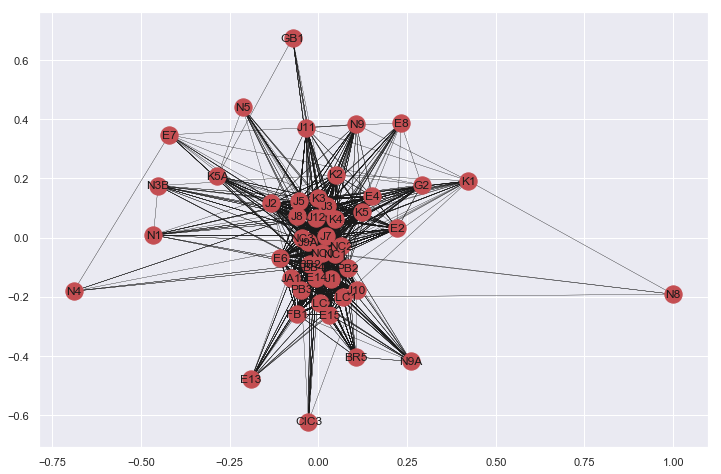

In [20]:
_ = plt.figure(figsize=(12,8))
_ = nx.drawing.nx_pylab.draw_networkx(phoG, width=0.2)
_ = plt.show()

In [21]:
sorted_centrality = sorted(nx.degree_centrality(phoG).items(), key = lambda x : x[1], reverse=True)
sorted_centrality[:10]

[('E14', 205.52173913043478),
 ('NC0', 131.47826086956522),
 ('BB2', 129.1304347826087),
 ('J7', 123.13043478260869),
 ('BB4', 110.73913043478261),
 ('J12', 98.21739130434783),
 ('J9A', 85.91304347826086),
 ('J1', 71.69565217391305),
 ('NC1', 71.52173913043478),
 ('J8', 54.34782608695652)]

Looking at the total number of failures for each 

In [22]:
wq_df.sum().iloc[33:41]

Top Ammonium (mg/L) Failure                                                             147
Top Active Chlorophyll 'A' (µg/L) Failure                                              3628
CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L) Failure    1764
Top Enterococci Bacteria (Cells/100mL) Failure                                         2186
Top Fecal Coliform Bacteria (Cells/100mL) Failure                                      1291
Top Total Kjeldhal Nitrogen (mg/L) Failure                                               11
Top PH Failure                                                                            7
Top Ortho-Phosphorus (mg/L) Failure                                                    1814
dtype: object

Create a graph of the site failures.

In [23]:
site_fail_df = wq_df.groupby('Sampling Location').mean().iloc[:, 28:39].drop(columns='Weather Condition (Dry or Wet)_W')

Next I create graphs using the average value of the failure column to alter the size of each marker. I used averages to control for differences in sampling frequency.

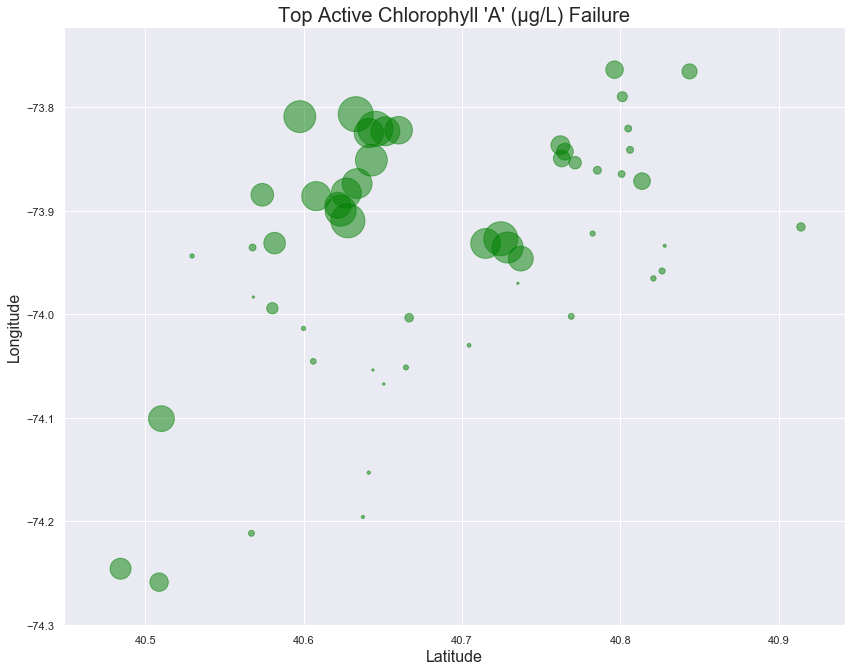

In [24]:
_ = plt.figure(figsize=(14, 11))
_ = plt.scatter(x=site_fail_df['Lat'], y=site_fail_df['Long'], 
                alpha=.5, c='green',
                s=site_fail_df['Top Active Chlorophyll \'A\' (µg/L) Failure']*2500)
_ = plt.title('Top Active Chlorophyll \'A\' (µg/L) Failure', fontsize=20)
_ = plt.xlabel('Latitude', fontsize=16)
_ = plt.ylabel('Longitude', fontsize=16)

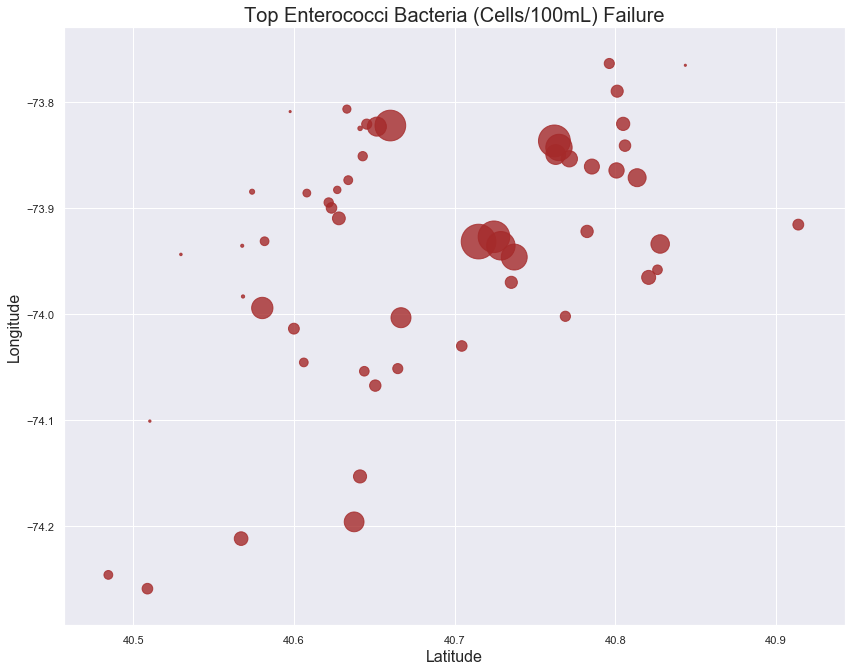

In [26]:
_ = plt.figure(figsize=(14, 11))
_ = plt.scatter(x=site_fail_df['Lat'], y=site_fail_df['Long'], 
                alpha=.8, c='brown',
                s=site_fail_df['Top Enterococci Bacteria (Cells/100mL) Failure']*2500)
_ = plt.title('Top Enterococci Bacteria (Cells/100mL) Failure', fontsize=20)
_ = plt.xlabel('Latitude', fontsize=16)
_ = plt.ylabel('Longitude', fontsize=16)

# want to add labels to top 5 sites

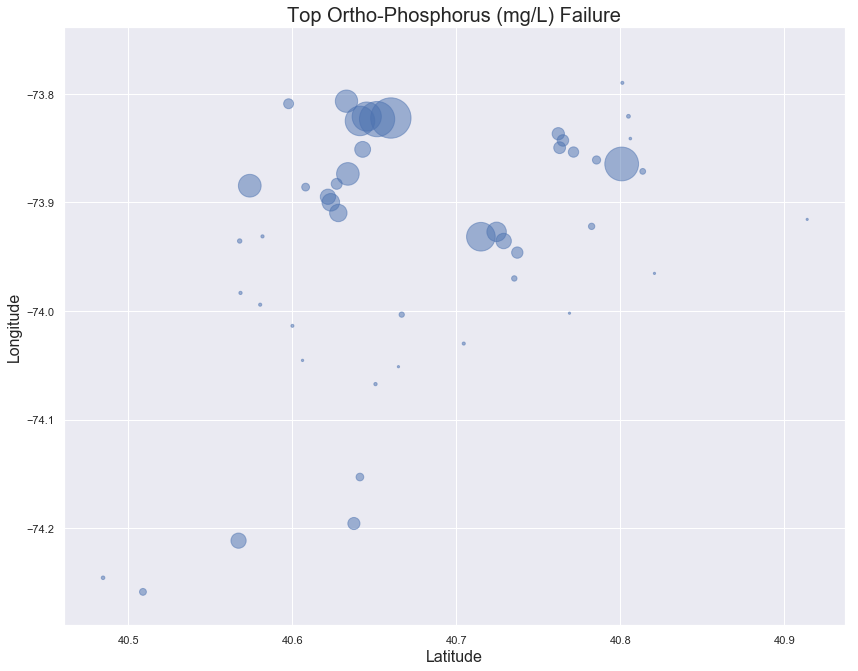

In [27]:
_ = plt.figure(figsize=(14, 11))
_ = plt.scatter(x=site_fail_df['Lat'], y=site_fail_df['Long'], 
                alpha=.5,
                s=site_fail_df['Top Ortho-Phosphorus (mg/L) Failure']*2500)
_ = plt.title('Top Ortho-Phosphorus (mg/L) Failure', fontsize=20)
_ = plt.xlabel('Latitude', fontsize=16)
_ = plt.ylabel('Longitude', fontsize=16)

# want to add labels to top 5 sites

In [ ]:
# Create same graphs but comparing monthly, dry vs wet,

Perform clustering on the different sites based on the frequency that they
if i want to cluster these sites and then 